In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0_part-0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0_part-0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dEscaleDown', 'dEscaleUp', 'dEsigmaDown', 'dEsigmaUp', 'deltaEtaSC', 'dr03EcalRecHitSumEt', 'dr03HcalDepth1TowerSumEt', 'dr03TkSumPt', 'dr03TkSumPtHEEP', 'dxy', 'dxyErr', 'dz', 'dzErr', 'eCorr', 'eInvMinusPInv', 'energyErr', 'eta', 'hoe', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'mvaFall17V2Iso', 'mvaFall17V2noIso', 'pfRelIso03_all', 'pfRelIso03_chg', 'phi', 'pt', 'r9', 'scEtOverPt', 'sieie', 'sip3d', 'mvaTTH', 'charge', 'cutBased', 'jetIdx', 'pdgId', 'photonIdx', 'tightCharge', 'vidNestedWPBitmap', 'vidNestedWPBitmapHEEP', 'convVeto', 'cutBased_HEEP', 'isPFcand', 'jetNDauCharged', 'lostHits', 'mvaFall17V2Iso_WP80', 'mvaFall17V2Iso_WP90', 'mvaFall17V2Iso_WPL', 'mvaFall17V2noIso_WP80', 'mvaFall17V2noIso_WP90', 'mvaFall17V2noIso_WPL', 'seedGain', 'genPartIdx', 'genPartFlav', 'cleanmask', 'genPartIdxG', 'jetIdxG', 'photonIdxG']


# Basic Information
## We want basic 4 vector or related variables

## eta

4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [-0.381], [], [], [], [], [], [], [], []]
2mu2e eta structure: [[-0.31, -0.276], [-1.66, -1.72], [-0.0475], ... [0.605, 0.647], [2.34], [1]]
4mu eta structure: [[2.3], [], [], [], [], [], [], [], [], ... [], [], [-1.87], [], [], [], [], []]
2mu2e eta structure: [[1.4, 1.36], [-0.0938, -0.0121], [-0.411, ... 0.229], [-1.81], [1.53, 1.66, -2.33]]
4mu eta structure: [[], [], [], [], [], [], [], [1.25, ... [], [-0.00894, -2.54], [], [], [-0.299], []]
2mu2e eta structure: [[], [0.505], [-1.75], [], [-0.881, -1.23], ... [0.708], [], [0.216], [], [-2.4]]
4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [-1.18], [], [], []]
2mu2e eta structure: [[2.49], [], [2.06], [], [], [], ... -0.541], [1.12, 0.982], [2.25, 2.18], [], []]
4mu eta structure: [[], [], [], [2.31], [], [], [], [], ... [0.731, 2.21], [], [], [], [], [-2.03], []]
2mu2e eta structure: [[], [], [], [], [], [], [], ... [], [], [-1.21], [], [-0.09

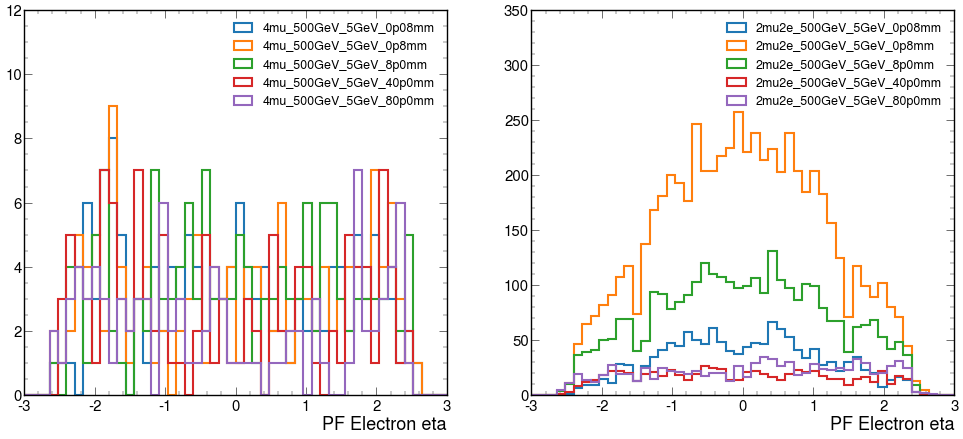

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_ylim(0,12)
ax[1].set_ylim(0,350)
ax[0].set_xlabel('PF Electron eta')
ax[1].set_xlabel('PF Electron eta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_ELECTRON/Basic/eta.png", bbox_inches="tight")

## mass

4mu mass structure: [[], [], [], [], [], [], [], [], [], ... 0.00864], [], [], [], [], [], [], [], []]
2mu2e mass structure: [[-0.0152, 0.00767], [-0.0751, 0.0363], ... 0.0369, -0.00901], [0.128], [0.0875]]
4mu mass structure: [[-0.00186], [], [], [], [], [], [], [], ... [], [], [-0.00948], [], [], [], [], []]
2mu2e mass structure: [[0.101, 0.0324], [-0.0474, 0.00417], ... [-0.0975], [-0.0174, 0.00177, -0.0134]]
4mu mass structure: [[], [], [], [], [], [], [], ... [], [0.00366, -0.00206], [], [], [0.000922], []]
2mu2e mass structure: [[], [0.00356], [-0.181], [], [0.049, ... 0.0634], [], [-0.0242], [], [-0.216]]
4mu mass structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [0.000439], [], [], []]
2mu2e mass structure: [[0.0214], [], [0.00561], [], [], ... -0.0104, -0.00211], [-0.00169, 0.0496], [], []]
4mu mass structure: [[], [], [], [-0.0105], [], [], [], ... -0.00736], [], [], [], [], [-0.0127], []]
2mu2e mass structure: [[], [], [], [], [], [], [], ... [], [], [0.005

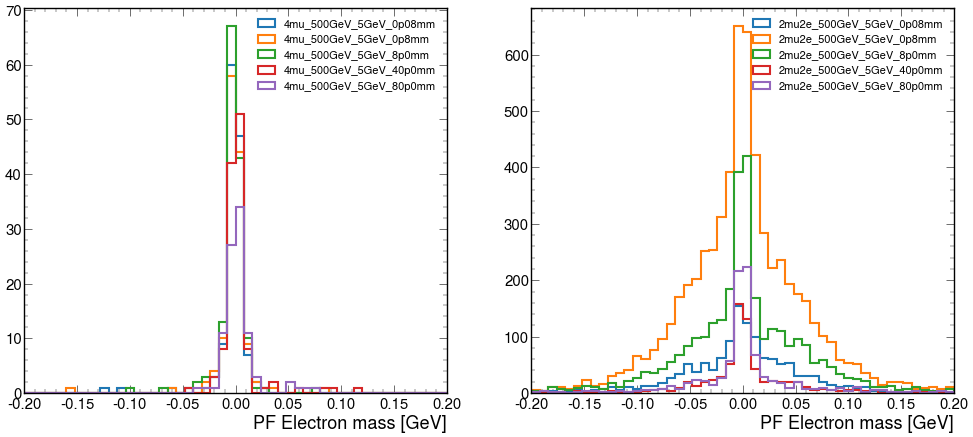

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mass", events_4mu[i_4mu].mass, events_2mu2e[i_2mu].mass)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mass), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mass), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.2,0.2)
ax[1].set_xlim(-0.2,0.2)
ax[0].set_xlabel('PF Electron mass [GeV]')
ax[1].set_xlabel('PF Electron mass [GeV]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_ELECTRON/Basic/mass.png", bbox_inches="tight")

## phi

4mu phi structure: [[], [], [], [], [], [], [], [], [], [], ... [-1.85], [], [], [], [], [], [], [], []]
2mu2e phi structure: [[-0.994, -1.06], [-0.481, -0.451], [-2.43], ... [0.0336, 0.0814], [-1.71], [0.221]]
4mu phi structure: [[-0.426], [], [], [], [], [], [], [], ... [], [], [-1.79], [], [], [], [], []]
2mu2e phi structure: [[-1.97, -2], [-2.88, -2.88], [1.52, 1.45, ... -2.22], [-0.766], [2.03, 1.93, 0.577]]
4mu phi structure: [[], [], [], [], [], [], [], [-0.343, ... [], [-2.38, -0.17], [], [], [-0.707], []]
2mu2e phi structure: [[], [-1.56], [-0.602], [], [-2.91, -1.54], ... [2.34], [], [-2.87], [], [2.17]]
4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [-1.23], [], [], []]
2mu2e phi structure: [[2.64], [], [-2.04], [], [], [], ... -1.62], [-2.6, -2.64], [2.56, 2.49], [], []]
4mu phi structure: [[], [], [], [0.594], [], [], [], [], ... [-1.1, 1.41], [], [], [], [], [0.0117], []]
2mu2e phi structure: [[], [], [], [], [], [], [], ... [], [], [-0.327], 

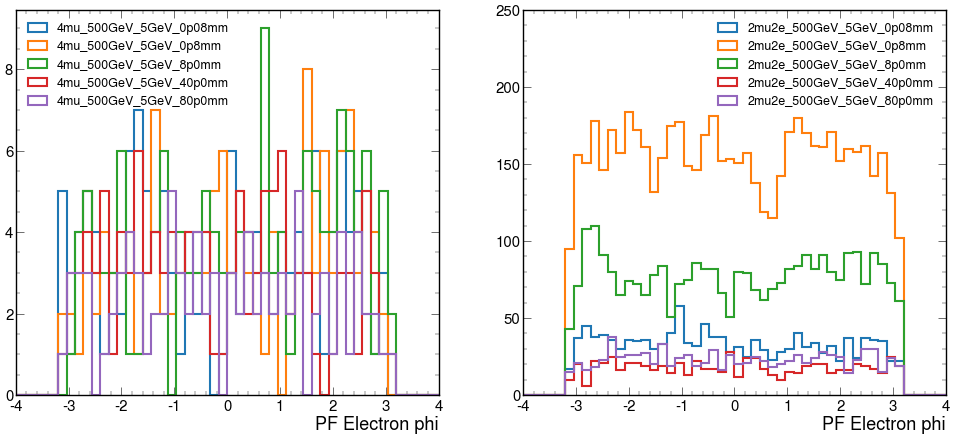

In [ ]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi", events_4mu[i_4mu].phi, events_2mu2e[i_2mu].phi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
#ax[0].set_ylim(0,180)
ax[1].set_ylim(0,250)
ax[0].set_xlabel('PF Electron phi')
ax[1].set_xlabel('PF Electron phi')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_ELECTRON/Basic/phi.png", bbox_inches="tight")

## pt

4mu pt structure: [[], [], [], [], [], [], [], [], [], [], ... [31.5], [], [], [], [], [], [], [], []]
2mu2e pt structure: [[91, 90.3], [175, 40.6], [302], [245], ... [210, 6], [223, 29.2], [202], [242]]
4mu pt structure: [[5.73], [], [], [], [], [], [], [], [], ... 24.9], [], [], [23], [], [], [], [], []]
2mu2e pt structure: [[146, 66.2], [180, 19], [236, 11], [131, ... 17], [296], [204], [44.8, 19.4, 10.1]]
4mu pt structure: [[], [], [], [], [], [], [], [20.9], ... [], [], [10.7, 6.44], [], [], [17.2], []]
2mu2e pt structure: [[], [15.3], [199], [], [355, 21.4], [], ... [], [], [161], [], [150], [], [209]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [6.24], [], [], []]
2mu2e pt structure: [[14.7], [], [5.38], [], [], [], [], ... [43.5], [124, 9.97], [82.4, 43], [], []]
4mu pt structure: [[], [], [], [6.74], [], [], [], [], ... [28.9, 10.9], [], [], [], [], [17.2], []]
2mu2e pt structure: [[], [], [], [], [], [], [], [7.54], ... [], [], [], [17.4], [], [

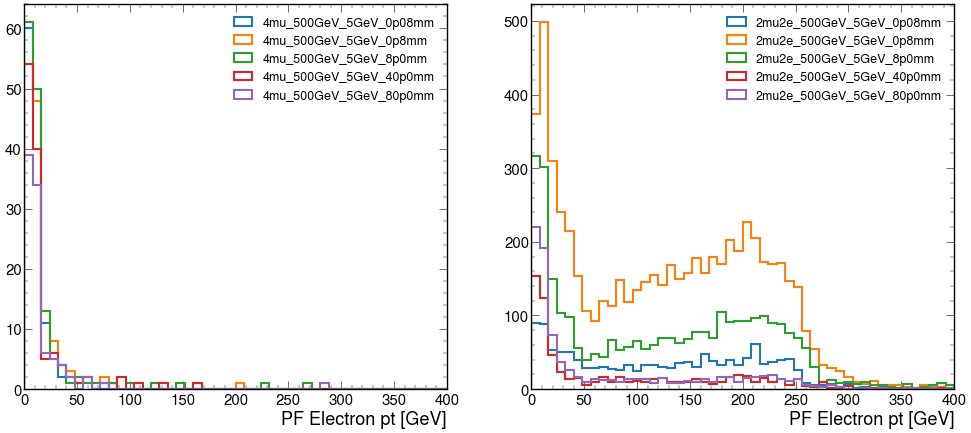

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,400)
ax[1].set_xlim(0,400)
ax[0].set_xlabel('PF Electron pt [GeV]')
ax[1].set_xlabel('PF Electron pt [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_ELECTRON/Basic/pt.png", bbox_inches="tight")

## deltaEtaSC

4mu deltaEtaSC structure: [[], [], [], [], [], [], [], [], [], ... 0.00641], [], [], [], [], [], [], [], []]
2mu2e deltaEtaSC structure: [[0.0184, 0.0166], [0.00274, 0.00323], ... -0.0153, -0.0164], [0.00647], [0.0211]]
4mu deltaEtaSC structure: [[-0.0114], [], [], [], [], [], [], [], ... [], [], [-0.0421], [], [], [], [], []]
2mu2e deltaEtaSC structure: [[0.0122, 0.0129], [0.0058, 0.00385], ... [0.0207], [0.0183, 0.0169, 0.025]]
4mu deltaEtaSC structure: [[], [], [], [], [], [], [], ... [], [0.0246, -0.0216], [], [], [0.00546], []]
2mu2e deltaEtaSC structure: [[], [0.0106], [0.00209], [], [-0.00625, ... -0.00564], [], [-0.0558], [], [0.0178]]
4mu deltaEtaSC structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [-0.000612], [], [], []]
2mu2e deltaEtaSC structure: [[0.00179], [], [0.00717], [], [], ... [-0.00488, 0.0195], [0.0202, 0.0227], [], []]
4mu deltaEtaSC structure: [[], [], [], [0.0683], [], [], [], ... 0.0103], [], [], [], [], [0.00837], []]
2mu2e deltaEtaSC struc

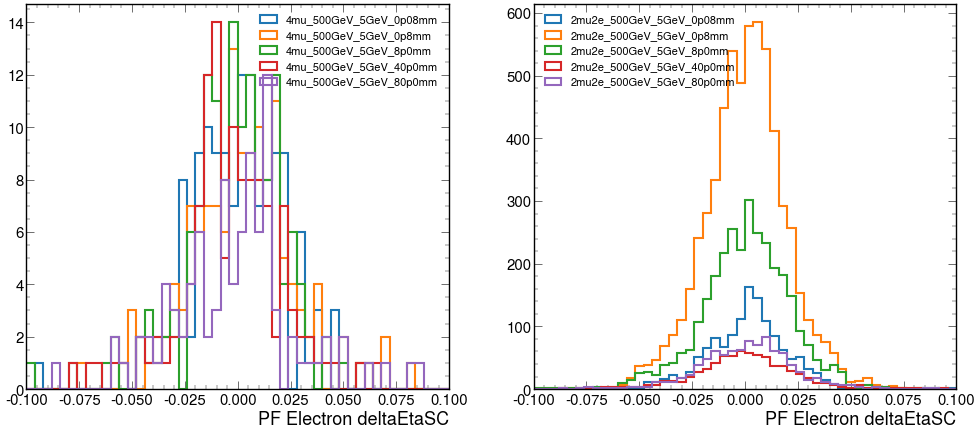

In [21]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("deltaEtaSC", events_4mu[i_4mu].deltaEtaSC, events_2mu2e[i_2mu].deltaEtaSC)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].deltaEtaSC), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].deltaEtaSC), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Electron deltaEtaSC')
ax[1].set_xlabel('PF Electron deltaEtaSC')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_ELECTRON/Basic/deltaEtaSC.png", bbox_inches="tight")

## jetPtRelv2

4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [], [], [], ... [1.14], [], [], [], [], [], [], [], []]
2mu2e jetPtRelv2 structure: [[5.38, 4.42], [7.42, 2.85], [238], [46.4, ... 0.84], [16.2, 1.79], [50.1], [42.1]]
4mu jetPtRelv2 structure: [[0], [], [], [], [], [], [], [], [], ... 0.885], [], [], [1.18], [], [], [], [], []]
2mu2e jetPtRelv2 structure: [[6.02, 3.11], [16.6, 1.56], [10.7, 1.07], ... [94.2], [30.8], [6.19, 3.31, 0.736]]
4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [4.61], ... [], [], [1.24, 0], [], [], [0.407], []]
2mu2e jetPtRelv2 structure: [[], [1.24], [16.7], [], [20.8, 1.89], [], ... [], [9.25], [], [5.42], [], [65]]
4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [], [], [], ... [1.16], [], [], [], [], [0], [], [], []]
2mu2e jetPtRelv2 structure: [[1.62], [], [0.926], [], [], [], [], ... [2.27], [18.2, 1.37], [6.59, 4.23], [], []]
4mu jetPtRelv2 structure: [[], [], [], [1.96], [], [], [], [], ... [0.666, 0], [], [], [], [], [0.518], []]
2mu

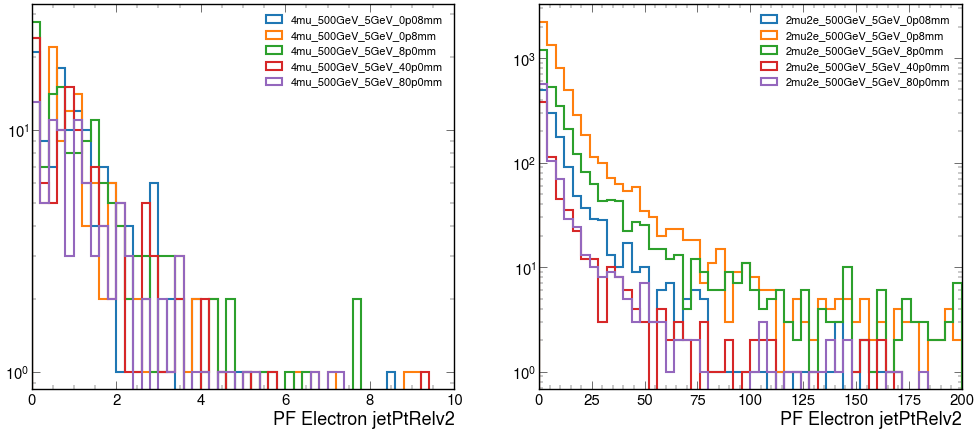

In [25]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("jetPtRelv2", events_4mu[i_4mu].jetPtRelv2, events_2mu2e[i_2mu].jetPtRelv2)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].jetPtRelv2), range=(0,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].jetPtRelv2), range=(0,200), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,10)
ax[1].set_xlim(0,200)
ax[0].set_xlabel('PF Electron jetPtRelv2')
ax[1].set_xlabel('PF Electron jetPtRelv2')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Basic/jetPtRelv2.png", bbox_inches="tight")

## sieie

4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [0.0143], [], [], [], [], [], [], [], []]
2mu2e sieie structure: [[0.0174, 0.016], [0.0507, 0.0468], ... 0.00951, 0.0137], [0.0251], [0.00934]]
4mu sieie structure: [[0.0453], [], [], [], [], [], [], [], ... [], [], [0.0274], [], [], [], [], []]
2mu2e sieie structure: [[0.0166, 0.0174], [0.00924, 0.017], ... [0.0225], [0.0225, 0.0249, 0.026]]
4mu sieie structure: [[], [], [], [], [], [], [], ... [], [0.0186, 0.0255], [], [], [0.00895], []]
2mu2e sieie structure: [[], [0.0132], [0.0224], [], [0.0091, ... 0.00938], [], [0.0142], [], [0.0226]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [0.0148], [], [], []]
2mu2e sieie structure: [[0.0456], [], [0.0512], [], [], ... [0.0089, 0.0101], [0.0358, 0.0347], [], []]
4mu sieie structure: [[], [], [], [0.0207], [], [], [], ... 0.042], [], [], [], [], [0.0417], []]
2mu2e sieie structure: [[], [], [], [], [], [], [], ... [], [], [0.0133], [], [0.0193, 0.

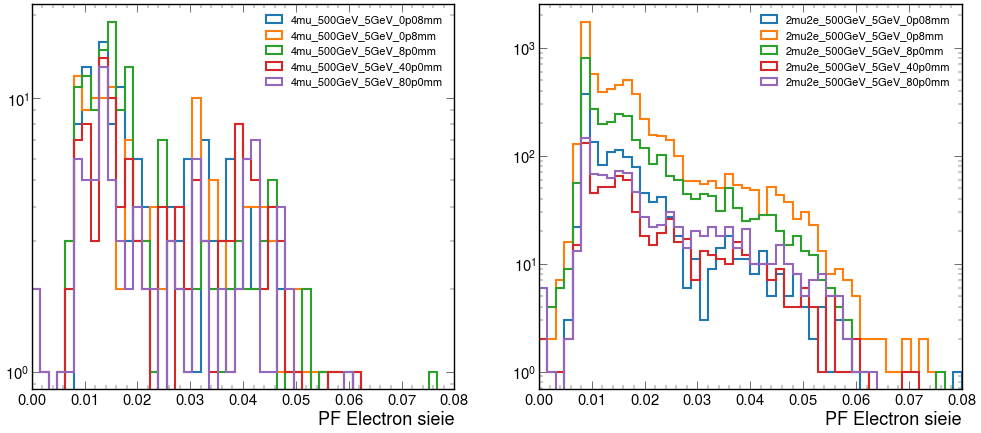

In [27]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("sieie", events_4mu[i_4mu].sieie, events_2mu2e[i_2mu].sieie)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].sieie), range=(0,0.08), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].sieie), range=(0,0.08), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,0.08)
ax[1].set_xlim(0,0.08)
ax[0].set_xlabel('PF Electron sieie')
ax[1].set_xlabel('PF Electron sieie')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Basic/sieie.png", bbox_inches="tight")

4mu r9 structure: [[], [], [], [], [], [], [], [], [], [], ... [0.482], [], [], [], [], [], [], [], []]
2mu2e r9 structure: [[0.979, 0.976], [0.961, 1.08], [0.86], ... [0.965, 0.879], [0.922], [0.821]]
4mu r9 structure: [[1.02], [], [], [], [], [], [], [], [], ... [], [], [0.937], [], [], [], [], []]
2mu2e r9 structure: [[0.771, 0.852], [0.952, 0.557], [0.965, ... 0.581], [0.959], [0.9, 1.03, 1.06]]
4mu r9 structure: [[], [], [], [], [], [], [], [0.496], ... [], [], [0.68, 0.799], [], [], [0.636], []]
2mu2e r9 structure: [[], [0.506], [0.585], [], [0.942, 0.658], ... [0.951], [], [1.02], [], [0.98]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [0.59], [], [], []]
2mu2e r9 structure: [[0.639], [], [0.805], [], [], [], ... 0.986], [0.941, 0.538], [1.02, 1.12], [], []]
4mu r9 structure: [[], [], [], [0.649], [], [], [], [], ... [0.516, 1.05], [], [], [], [], [0.552], []]
2mu2e r9 structure: [[], [], [], [], [], [], [], [0.853], ... [], [], [], [0.507], [], [0

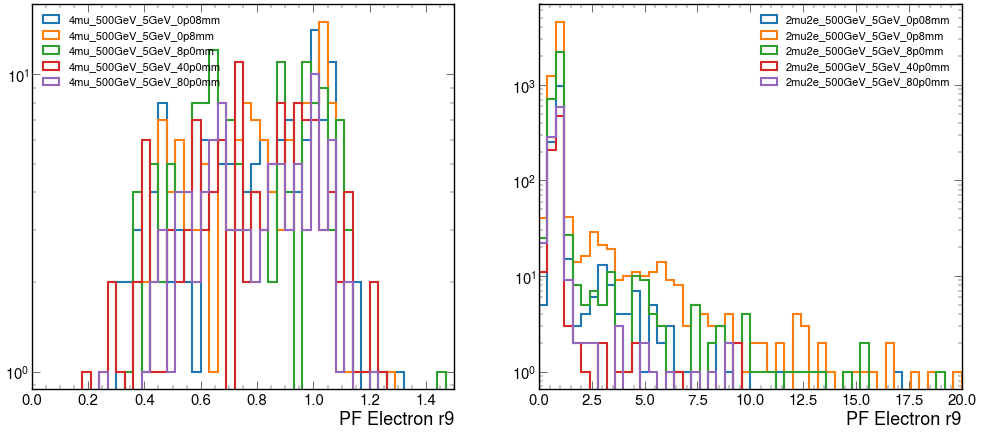

In [29]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("r9", events_4mu[i_4mu].r9, events_2mu2e[i_2mu].r9)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].r9), range=(0,1.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].r9), range=(0,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,1.5)
ax[1].set_xlim(0,20)
ax[0].set_xlabel('PF Electron r9')
ax[1].set_xlabel('PF Electron r9')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Basic/r9.png", bbox_inches="tight")